# 『採点者の方へ』
「Colab データインストール 」部分削除し
jupyter notebook等で該当のデータを読み込む形に直して利用ください。

# Colab データインストール

In [0]:
# 以下を実行すると、認証情報を取得するための許可を求められるので、許可してトークンを発行し、テキストボックスに貼り付ける。
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()

In [4]:
# Colabにおいてデータを読みこむ。グーグルドライブをマウントします。その為に必要なパッケージを取得しておく。
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse


Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

Setting up libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Setting up unattended-upgrades (0.98ubuntu1.1) ...

Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8.1) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting up module-init-tools (24-1ubuntu2

In [5]:
# 以下実行により、今度は google-drive-ocamlfuse によるアクセスの許可を聞かれる。これも許可する。
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [39]:
# 今回は指定したフォルダのみマウントする
!cp -f ~/.gdfuse/default/config config
!sed -i -e "s/^root_folder=$/root_folder=1FwGdPnKlcYYRe1mZGE5Ci-PWlIY8k5J7/" config
# 上記が正常に終われば、ようやくマウントが可能となる。
!mkdir -p drive
!google-drive-ocamlfuse -config ./config -cc drive
!ls drive

Clearing cache...done
compare-deeplibs.ipynb	    EDA-2-instacart.ipynb	kernel_2.ipynb
dataマウントテンプレ.ipynb  EDA-3-mercedes.ipynb	kernel_3.ipynb
dataset			    EDA-4-porto-insights.ipynb	kernel_4.ipynb
EDA-1-house-price.ipynb     kernel_1.ipynb


In [42]:
# これ以降はターミナルと同様にディレクトリを扱える
cd drive/dataset

/content/drive/dataset


In [43]:
ls

House Prices_data/        Mercedes-Benz Greener Manufacturing/
Instacart Market Basket/  Porto Seguro’s Safe Driver Prediction/


In [44]:
cd Porto Seguro’s Safe Driver Prediction

/content/drive/dataset/Porto Seguro’s Safe Driver Prediction


In [45]:
ls

config  sample_submission.csv  test.csv  train.csv  tree1.dot  tree1.png


# EDA課題4

# 前書き

この大会は、ブラジルの3番目に大きな保険会社、ポルト・セグロが主催し、来年に運転手が保険金請求を開始する可能性を予測するものです。

このノートブックは、PythonビジュアライゼーションライブラリPlot.lyを使っていくつかのインタラクティブなチャートと競合データの分析を提供し、他の人が取ったり複製したりできるいくつかの洞察と美しいプロットをもたらすことを目指します。Plot.lyは、オンラインのグラフィカルおよび統計的な視覚化（チャートおよびダッシュボード）の提供を専門とするソフトウェア会社Plotlyが提供する主要製品の1つです、Python、 R、Matlab、Node.jsなどと同じです。


* 単純な横棒グラフ - ターゲット変数の分布を検査するために使用されます
* 相関ヒートマッププロット - 異なるフィーチャ間の相関関係を検査する
* 散布図 - ランダムフォレストとグラデーションブーストモデルで生成されたフィーチャの高さを比較します。
* 縦棒グラフ - 降順のリスト、さまざまな機能の重要性
* 3D散布図

このノートブックのテーマは以下のように簡単に要約できます：


1. データ品質チェック - すべての欠損値/ヌル値（-1の値）の可視化と評価

2. 未来検査とフィルタリング - 相関と未来ターゲット変数に対する相互情報の図。バイナリ、カテゴリおよびその他の変数の検査。

3. 学習モデルによる特徴の重要度ランキング / n学習プロセスに基づいて特徴をランク付けするのに役立つランダムフォレストと勾配ブースティングを構築する。

In [0]:
# colabでplotlyを使うおまじない
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [12]:
# Let us load in the relevant Python modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

Pandasを使用して提供されたトレーニングデータを読み込みましょう。

In [13]:
train = pd.read_csv("train.csv")
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [14]:
# Taking a look at how many rows and columns the train dataset contains
rows = train.shape[0]
columns = train.shape[1]
print("The train dataset contains {0} rows and {1} columns".format(rows, columns))

The train dataset contains 595212 rows and 59 columns


<a id='quality'></a>
## 1. データ品質チェック

**Null値または欠損値のチェック**

品質検査の一環として、次のように訓練データセットにNull値があるかどうかを素早く見てみましょう。

In [15]:
# any() applied twice to check run the isnull check across all columns.
train.isnull().any().any()

False

* Our null values check returns False but however, this does not really mean that this case has been closed as the data is also described as ["Values of -1 indicate that the feature was missing from the observation"](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data). Therefore I take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data.

私たちのNull値チェックはFalseを返しますが、データセットは"-1の値は観測から欠落していることを示します"と記述されているため、このケースが正しいということとは限りません。したがって、ポルト・セグロは、データのすべてのNull値を-1の値で置換しただけです。データの欠損値がどこにあるのか調べてみましょう。

ここでは、どの列が値に-1を含んでいるかを見ることができます。たとえば、次のように、すべて-1をNullに置換することができます。

In [0]:
train_copy = train
train_copy = train_copy.replace(-1, np.NaN)

次に、データセットの欠損値を視覚化する上で最も有用で便利なツールである「Missingno」(パッケージの作成者は、KagglerのAleksey Bilogur氏)を使用することができます。

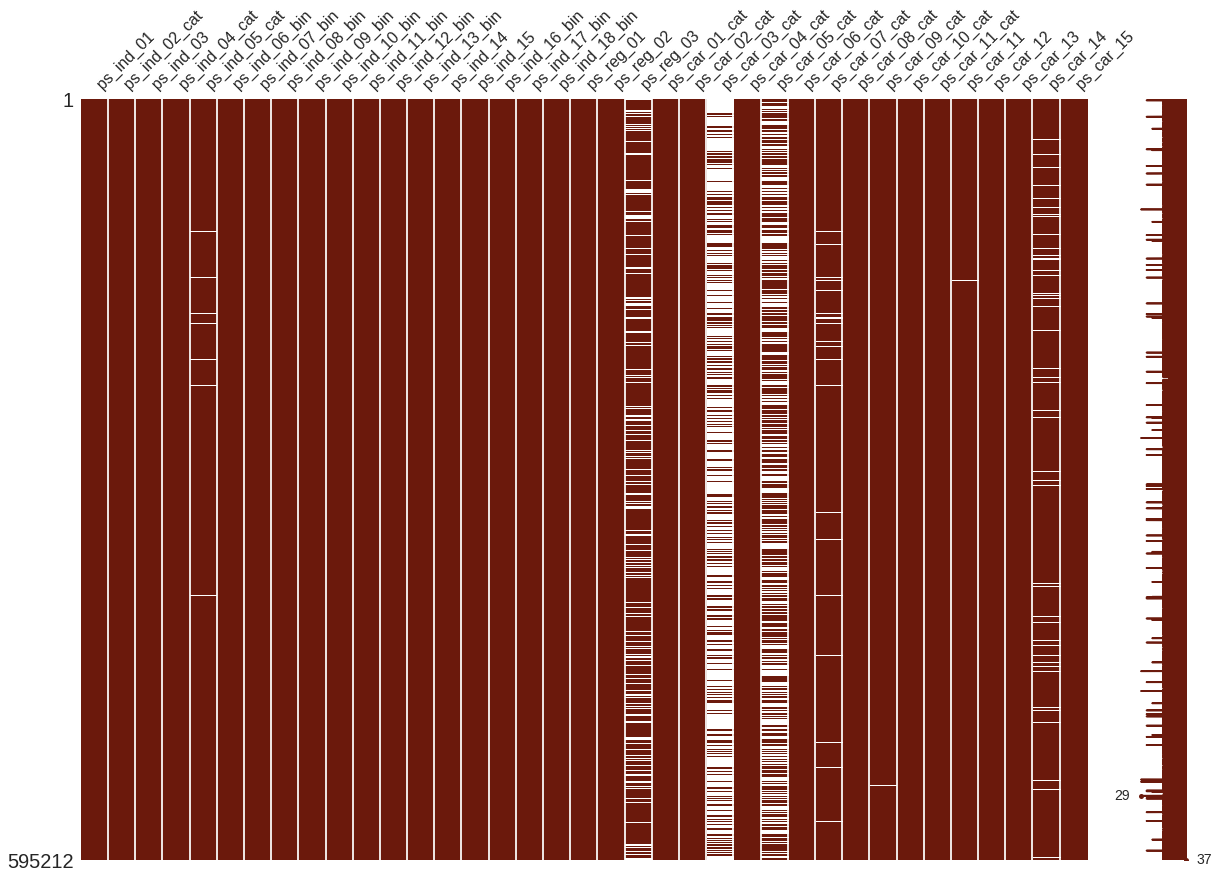

In [17]:
!pip install missingno
# Colabに入れる用

import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=train_copy.iloc[:,2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

欠けている値は、視覚化すると明らかになります。空白の白いバンド（欠落しているデータ）は、縦の濃い赤いバンド（重複していないデータ）に重なってデータの無効をその特定の列に表示され反映します。この例では、59のトータルフィーチャのうち7つのフィーチャがそうであることがわかります（コメントセクションのJustin Nafeが指摘しているように、実際には合計13列の値が欠落しています）。これは、不足している散布図が約40個の奇数のフィーチャーに1つのプロットにしか快適に収まらず、その後いくつかの列が除外され、残りの5つのNull列が除外されているためです。

私たちが見ることができる7つのNull列については、以下のようにリストできます。

ps_ind_05_cat | ps_reg_03 | ps_car_03_cat | ps_car_05_cat | ps_car_07_cat | ps_car_09_cat | ps_car_14

欠損値の大部分は、_catで終わる列に現れるようです。実際にはps_reg_03、ps_car_03_cat、ps_car_05_catはさらに注意する必要があります。白から暗のバンドの比率から明らかなように、これらの3つの列から値の大多数が欠落していることは非常に明白であり、したがって、Nullの-1の置換は良い戦略ではないかもしれません。

**ターゲット変数検査**

Another standard check normally conducted on the data is with regards to our target variable, where in this case, the column is conveniently titled "target". The target value also comes by the moniker of class/label/correct answer and is used in supervised learning models along with the corresponding data that is given (in our case all our train data except the id column) to learn the function that best maps the data to our target in the hope that this learned function can generalize and predict well with new unseen data.

データ上で通常行われるもう1つのチェックは、この場合、列が便宜的に「ターゲット」と題されたターゲット変数に関するものです。目標値はまた、クラス/ラベル/正解のあだ名によって与えられ、教師付き学習モデルで使用される。それは、この学習されたモデルが新しい目に見えないデータで上手く一般化し、予測できるように、データ(私たちの場合、idカラムを除くすべての列車データ)を目標に最もよくマッピングする関数を学習するために与えられます。

In [18]:
configure_plotly_browser_state()
# colabでplotlyを表示するおまじない（これはセルごとに必要）

data = [go.Bar(
            x = train["target"].value_counts().index.values,
            y = train["target"].value_counts().values,
            text='Distribution of target variable'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

Hmmn, the target variable is rather imbalanced so it might be something to keep in mind. An imbalanced target will prove quite

うーん、目標変数はむしろ不均衡なので、心に留めておくべきことかもしれません。

**データ型チェック**

This check is carried out to see what kind of datatypes the train set is comprised of : integers or characters or floats just to gain a better overview of the data we were provided with. One trick to obtain counts of the unique types in a python sequence is to use the Counter method, when you import the **Collections** module as follows:

このチェックは、訓練データがどのような種類のデータ型で構成されているかを確認するために実行されます。文字列または浮動小数点数は、提供されたデータのより良い概要を得るためにのみ使用されます。Pythonシーケンスで一意の型の数を取得する1つのトリックは、次のようにCollectionsモジュールをインポートするときにCounterメソッドを使用することです

In [19]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

As alluded to above, there are a total of 59 columns that make up the train dataset and as we can observe from this check, the features/columns consist of only two datatypes - Integer and floats. 

Another point to note is that Porto Seguro has actually provided us data with headers that come suffixed with abbreviations such as "_bin", "_cat" and "_reg", where they have given us a rough explanation that _bin indicates binary features while _cat indicates categorical features whilst the rest are either continuous or ordinal features. Here I shall simplify this a bit further just by looking at float values (probably only the continuous features) and integer datatypes (binary, categorical and ordinal features).

上記のように訓練データセットを構成する合計59の列があり、このチェックからわかるように、特徴/列は整数と浮動小数点の2つのデータ型のみで構成されています。

Porto Seguroは実際には、_bin、_cat、_regのような略語が末尾に付いたヘッダーをデータとして提供しています。_binはバイナリフィーチャを示し、_catはカテゴリフィーチャを示し、残りは連続フィーチャまたは順序フィーチャのいずれかであるという大まかな説明を与えています。ここでは、浮動小数点数（たぶん連続フィーチャのみ）と整数データ型（バイナリ、カテゴリ、および序数フィーチャ）を見るだけでこれをさらに単純化できます。

In [0]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

## 相関プロット

As a starter, let us generate some linear correlation plots just to have a quick look at how a feature is linearly correlated to the next and perhaps start gaining some insights from here. At this juncture, I will use the seaborn statistical visualisation package to plot a heatmap of the correlation values. Conveniently, Pandas dataframes come with the corr() method inbuilt, which calculates the Pearson correlation. Also as convenient is Seaborn's way of invoking a correlation plot. Just literally the word "heatmap"

まず、特徴が次の特徴とどのように線形関係にあるかを見て、ここからいくつかの洞察を得るために、線形相関プロットを生成してみましょう。ここでは、seabornの統計的視覚化パッケージを使用して、相関値のヒートマップをプロットします。便利なことに、Pandasのデータフレームには、Pearson相関を計算するcorr（）メソッドが組み込まれています。また、Seabornの相関プロットの呼び出し方法も便利です。

**浮動小数点機能の相関**

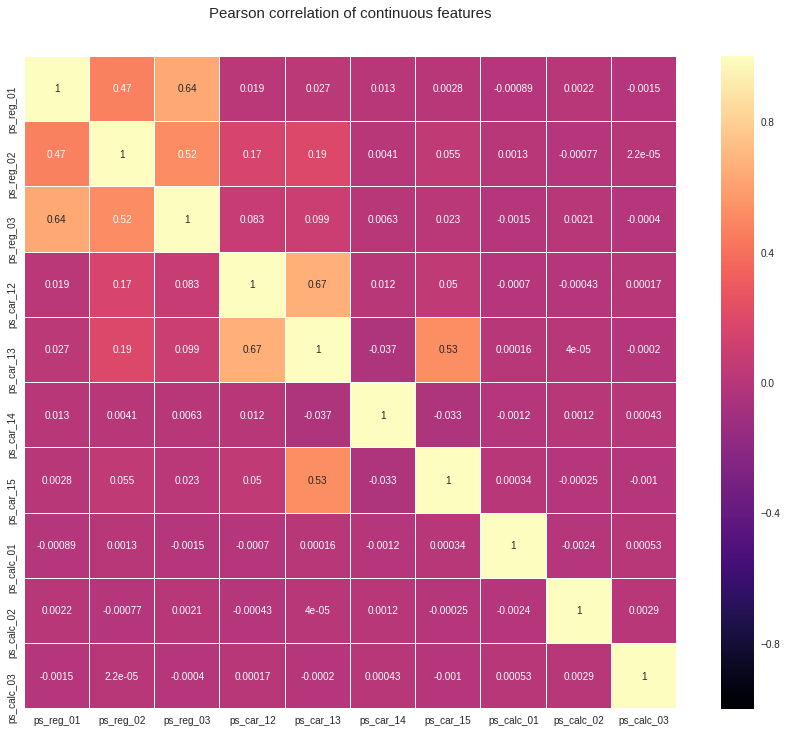

In [21]:
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train_float.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

From the correlation plot, we can see that the majority of the features display zero or no correlation to one another. This is quite an interesting observation that will warrant our further investigation later down. For now, the paired features that display a positive linear correlation are listed as follows:

相関プロットから、大部分のフィーチャは互いにゼロまたは非相関を表示することがわかります。これは私たちのさらなる調査を後で保証することになる、非常に興味深い観察です。現時点では、正の線形相関を示す対のフィーチャが次のようにリストされています。

**(ps_reg_01, ps_reg_03)**

**(ps_reg_02, ps_reg_03)**

**(ps_car_12, ps_car_13)**

**(ps_car_13, ps_car_15)**

**整数特徴の相関**

For the columns of interger datatype, I shall now switch to using the Plotly library to show how one can also generate a heatmap of correlation values interactively. Much like our earlier Plotly plot, we generate a heatmap object by simply invoking the "go.Heatmap". Here we have to provide values to three different axes, where x and y axes take in the column names while the correlation value is provided by the z-axis. The colorscale attribute takes in keywords that correspond to different color palettes that you will see in the heatmap where in this example, I have used the Greys colorscale (others include Portland and Viridis - try it for yourself). 

intergerデータ型の列については、Plotlyライブラリを使用して、相関値のヒートマップをインタラクティブに生成する方法を用います。以前のPlotlyプロットと同様に、単に "go.Heatmap"を呼び出すことでヒートマップオブジェクトを生成します。ここでは、3つの異なる軸に値を入力する必要があります。ここで、x軸とy軸は列名を取り込み、相関値はz軸で与えられます。colorscale属性は、ヒートマップに表示されるさまざまなカラーパレットに対応するキーワードを取ります。この例では、私はGraysのカラースケールを使用しています（他のものにはPortlandとViridisが含まれます）。

In [22]:
configure_plotly_browser_state()
#train_int = train_int.drop(["id", "target"], axis=1)
# colormap = plt.cm.bone
# plt.figure(figsize=(21,16))
# plt.title('Pearson correlation of categorical features', y=1.05, size=15)
# sns.heatmap(train_cat.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)
data = [
    go.Heatmap(
        z= train_int.corr().values,
        x=train_int.columns.values,
        y=train_int.columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
        opacity = 1.0 )
]

layout = go.Layout(
    title='Pearson Correlation of Integer-type features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

Similarly, we can observe that there are a huge number of columns that are not linearly correlated with each other at all, evident from the fact that we observe quite a lot of 0 value cells in our correlation plot. This is quite a useful observation to us, especially if we are trying to perform dimensionality reduction transformations such as Principal Component Analysis (PCA), this would require a certain degree of correlation  . We can note some features of interest are as follows:

***Negatively correlated features*** : ps_ind_06_bin, ps_ind_07_bin,  ps_ind_08_bin,  ps_ind_09_bin

One interesting aspect to note is that in our earlier analysis on nullity, ps_car_03_cat and ps_car_05_cat were found to contain many missing or null values. Therefore it should come as no surprise that both these features show quite a strong positive linear correlation to each other on this basis, albeit one that may not really reflect the underlying truth for the data.

上と同様に、相関プロットでは0の値のセルが非常に多く観測されていることから、直線的に相関しない膨大な数の列が存在することがわかります。特に、主成分分析（PCA）などの次元削減変換を実行しようとしている場合は、ある程度の相関が必要です。興味のある機能は次のとおりです。

負の相関機能：ps_ind_06_bin、ps_ind_07_bin、ps_ind_08_bin、ps_ind_09_bin

注目すべき興味深いところは、私たちの初期の欠損値解析では、ps_car_03_catとps_car_05_catに多くの欠損値またはNull値が含まれていることが分かりました。したがって、これらの両方の特徴が、データの根底にある真理を実際に反映していないかもしれないにもかかわらず、この図で互いに強い正の線形相関を示しています。

## 相互情報プロット

Mutual information is another useful tool as it allows one to inspect the mutual information between the target variable and the corresponding feature it is calculated against. For classification problems, we can conveniently call Sklearn's mutual_info_classif method which measures the dependency between two random variables and ranges from zero (where the random variables are independent of each other) to higher values (indicate some dependency). This therefore will help give us an idea of how much information from the target may be contained within the features.

相互情報は、ターゲット変数とそれに対して計算される特徴量との間の相互情報を可視化することを可能にするもう1つの有用なツールである。分類問題では、Sklearnのmutual_info_classifメソッドを呼び出すことで、2つの確率変数間の依存関係を測定し、ゼロ（ランダム変数が互いに独立している）からより高い値（依存関係を示す）までの範囲で簡単に呼び出すことができます。これは、ターゲットからのどのくらいの情報が特徴量内に含まれるのかを私たちに知らせるのに役立ちます。


In [23]:
mf = mutual_info_classif(train_float.values,train.target.values,n_neighbors=3, random_state=17 )
print(mf)

[0.01402035 0.00431986 0.0055185  0.00778454 0.00157233 0.00197537
 0.01226    0.00553038 0.00545101 0.00562139]


## バイナリ機能検査

Another aspect of the data that we may want to inspect would be the columns that only contain binary values, i.e where values take on only either of the two values 1 or 0. Proceeding, we store all columns that contain these binary values and then generate a vertical plotly barplot of these binary values as follows:

まだ検査する可能性のあるこのデータの別の側面は、バイナリ値のみを含む列です。この列は値が1または0の2つの値のどちらか一方しか取ることはありません。これらのバイナリ値を含むすべての列を格納したプロットは次のようになります。

In [0]:
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

In [25]:
configure_plotly_browser_state()

trace1 = go.Bar(
    x=bin_col,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

Here we observe that there are 4 features : ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros. This begs the question of whether these features are useful at all as they do not contain much information about the other class vis-a-vis the target.

ここでは、ps_ind_10_bin、ps_ind_11_bin、ps_ind_12_bin、ps_ind_13_binの4つの機能が存在することがわかります。これらはゼロの値がほとんどです。これは、ターゲットに対する他のクラスに関する多くの情報を含んでいないので、これらのbinがまったく有用でないという問題を招きます。

## カテゴリカルおよび序列検査

Let us first take a look at the features that are termed categorical as per their suffix "_cat". 

最初に、接尾辞 "_cat"のようにカテゴリに分類される機能を見てみましょう

## ランダムフォレストによる機能の重要性

Let us now implement a Random Forest model where we fit the training data with a Random Forest Classifier and look at the ranking of the features after the model has finished training. This is a quick way of using an ensemble model (ensemble of weak decision tree learners applied under Bootstrap aggregated) which does not require much parameter tuning in obtaining useful feature importances and is also pretty robust to target imbalances. We call the Random Forest as follows:

ここではランダムフォレストモデルを実装し、ランダムフォレスト分類とトレーニングデータを適合させ、モデルがトレーニングを終えた後の特徴量のランキングを見てみましょう。これは、有益な特徴量を取得する際に多くのパラメータ調整を必要とせず、ターゲットの不均衡に対してかなり堅牢なアンサンブルモデル（ブートストラップの下で適用された弱い決定木のアンサンブル）を使用する迅速な方法です。私たちはランダムフォレストを以下のように呼んでいます：

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(train.drop(['id', 'target'],axis=1), train.target)
features = train.drop(['id', 'target'],axis=1).columns.values
print("----- Training Done -----")

----- Training Done -----


**特徴量の重要性を示すPlot.ly 散布図**

Having trained the Random Forest, we can obtain the list of feature importances by invoking the attribute "feature_importances_" and plot our next Plotly plot, the Scatter plot.

Here we invoke the command Scatter and as per the previous Plotly plots, we have to define our y and x-axes. However the one thing that we pay attention to in scatter plots is the marker attribute. It is the marker attribute where we define and hence control the size, color and scale of the scatter points embedded.

ランダムフォレストの訓練した後、属性「feature importances」を呼び出して次のPlotly散布図をプロットして、特徴の重要性のリストを取得できます。

ここでは、Scatterコマンドを呼び出し、前のPlotlyプロットと同様に、y軸とx軸を定義する必要があります。今回、注意を払うのはマーカー属性です。埋め込まれた散布点のサイズ、色、スケールを定義し、制御するのがマーカー属性です。

In [27]:
configure_plotly_browser_state()
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

Furthermore we could also display a sorted list of all the features ranked by order of their importance, from highest to lowest via the same plotly barplots as follows:

さらに、重要度の高い順にランク付けされたすべての特徴がソートされたリストを、次のような同じプロットの棒グラフを使用して最高値から最低まで表示することもできます。

In [28]:
configure_plotly_browser_state()
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

**決定木の視覚化**

One other interesting trick or technique oft used would be to visualize the tree branches or decisions made by the model. For simplicity, I fit a decision tree (of max_depth = 3) and hence you only see 3 levels in the decision branch, use the export to graph visualization attribute in sklearn "export_graphviz" and then export and import the tree image for visualization in this notebook.

他の興味深いトリックやテクニックの1つは、モデルによって作られた木の枝や意思決定を視覚化することです。シンプルにするために、私は決定木（max_depth = 3）に合わせているので、決定ブランチで3つのレベルしか見ることができず、グラフにエクスポートされたsklearn "export_graphviz"の可視化属性が
このノートブックでの可視化のためにツリーイメージをエクスポートおよびインポートします。

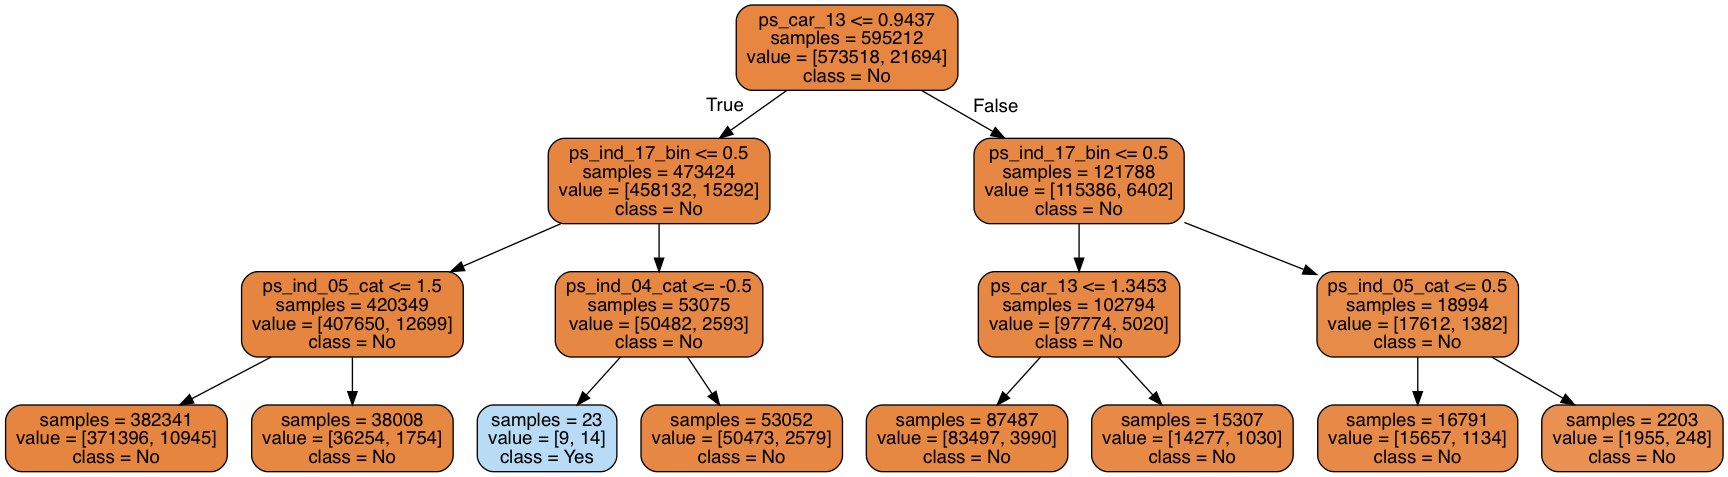

In [46]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(train.drop(['id', 'target'],axis=1), train.target)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = train.drop(['id', 'target'],axis=1).columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
#check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png",)

## 勾配ブースティングモデルによる機能の重要性

Just for curiosity, let us try another learning method in getting our feature importances. This time, we use a Gradient Boosting classifier to fit to the training data . Gradient Boosting proceeds in a forward stage-wise fashion, where at each stage regression tress are fitted on the gradient of the loss function (which defaults to the deviance in Sklearn implementation). 

特徴を得るために別の学習方法を試してみましょう。今回は、Gradient Boostingクラシファイアを使用してトレーニングデータに合わせます。勾配ブースティングは、各ステージで回帰トレスが損失関数の傾き（Sklearnの実装ではデフォルト値である）に当てはまる、段階的な方法で進行します。

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, min_samples_leaf=4, max_features=0.2, random_state=0)
gb.fit(train.drop(['id', 'target'],axis=1), train.target)
features = train.drop(['id', 'target'],axis=1).columns.values
print("----- Training Done -----")

----- Training Done -----


In [33]:
configure_plotly_browser_state()
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Machine Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [34]:
configure_plotly_browser_state()
x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Gradient Boosting Classifer Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

Interestingly we observe that in both Random forest and Gradient Boosted learning models, the most important feature that both models picked out was the column : **ps_car_13**. 

This particular feature warrants further investigation so let us conduct a deep-dive into it.

興味深いことに、ランダムフォレストとグラジエントブースト学習モデルの両方で、両方のモデルが選んだ最も重要な特徴は、列：ps_car_13でした。

この実験結果は詳細な調査を必要とするため、深く掘り下げて検討してください。

# 結論

We have performed quite an extensive inspection of the Porto Seguro dataset by inspecting for null values and data quality, investigated linear correlations between features, inspected some of the feature distributions  as well as implemented a couple of learning models (Random forest and Gradient Boosting classifier) so as to identify features that the models deemed important. 

我々は、Null値とデータ品質を検査し、特徴量間の線形相関を調べ、特徴量分布のいくつかを検査し、いくつかの学習モデル（ランダムフォレストとグラジエントブースト分類器）を実装して、Porto Seguroデータセットの検査を行った。モデルが重要であると判断する特徴を識別することができるようになりました。